In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from aging.behavior.syllables import relabel_by_usage
from aging.plotting import (
    figure,
    save_factory,
    PlotConfig,
    format_plots,
    ONTOGENY_AGE_CMAP,
    add_identity,
    legend,
)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from toolz import valmap, keyfilter

from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, LeaveOneGroupOut, GridSearchCV, GroupKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.kernel_ridge import KernelRidge

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "dynamics-of-aging", tight_layout=False)

In [3]:
df = pd.read_parquet(
    "/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_usage_matrix_v00.parquet"
)

In [4]:
age_scaler = StandardScaler()
x = df.index.get_level_values("age")
x = age_scaler.fit_transform(x.to_numpy()[:, None])
time = np.linspace(np.min(x), np.max(x), 300)[:, None]

In [5]:
keep_sylls = list(range(60))

kernel = 1 * RBF(length_scale=5e2, length_scale_bounds=(1e-3, 1e3))

out = {}
grads = {}

index = pd.Index(age_scaler.inverse_transform(time).squeeze(), name="age")

r2_scores = {}

for syll in tqdm(keep_sylls):
    y = df[syll]
    gp = GaussianProcessRegressor(
        kernel=kernel, n_restarts_optimizer=5, alpha=2.75, normalize_y=True
    )
    gp.fit(x, y)
    r2_scores[syll] = gp.score(x, y)
    grads[syll] = np.gradient(gp.predict(time), time.squeeze())
    out[syll] = pd.Series(gp.predict(time), index=index, name="Predicted usage")

  0%|          | 0/60 [00:00<?, ?it/s]

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/wg41/miniconda3/envs/

<Axes: xlabel='age', ylabel='0'>

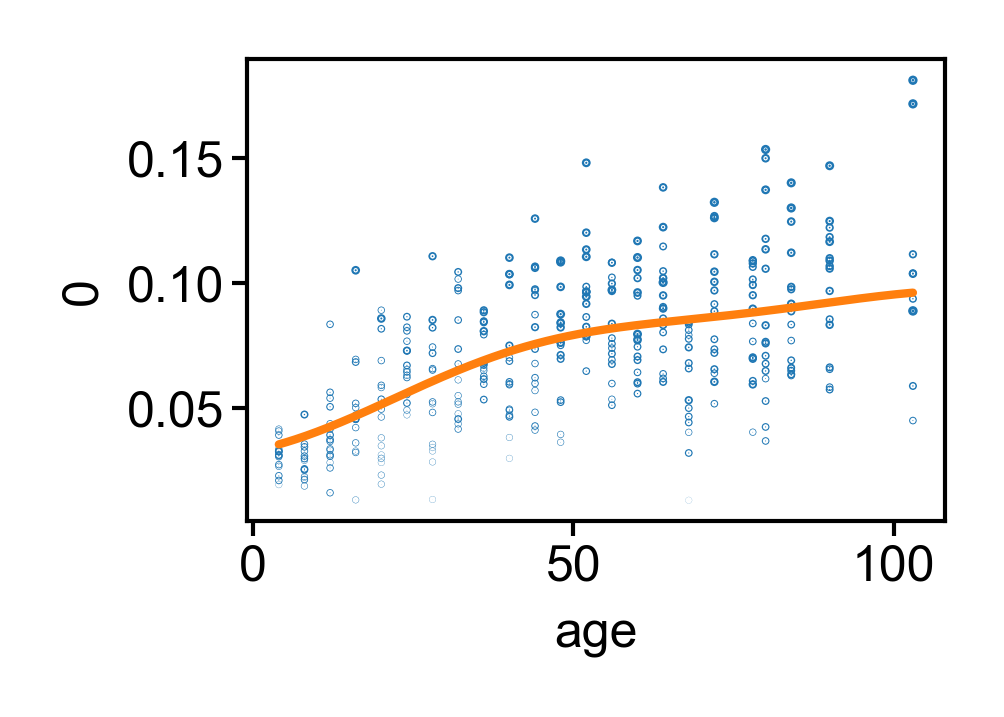

In [6]:
fig = figure(1.5, 1)
ax = fig.gca()
df.reset_index().plot(kind='scatter', y=keep_sylls[0], x='age', s=10, ax=ax)
out[keep_sylls[0]].plot(ax=ax, c='C1')

In [7]:
score_thresh = 0.2
keep_grads = keyfilter(lambda k: (r2_scores[k] > score_thresh), grads)

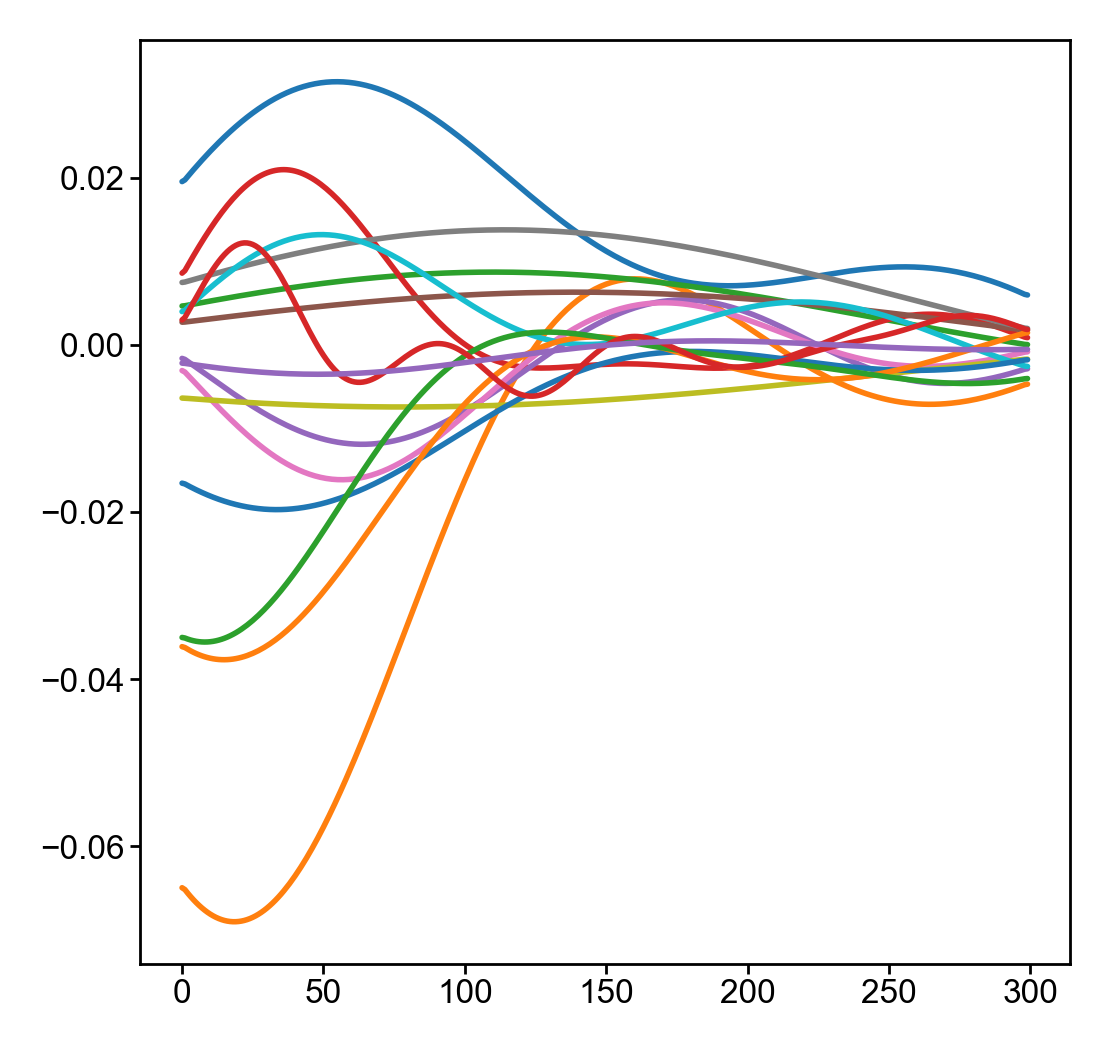

In [8]:
for k, v in keep_grads.items():
    plt.plot(v, label=k)

In [9]:
# for k, v in keep_grads.items():
#     figure(1, 0.5)
#     plt.plot(v)
#     plt.title(k)

In [10]:
grad_array = np.array(list(keep_grads.values()))

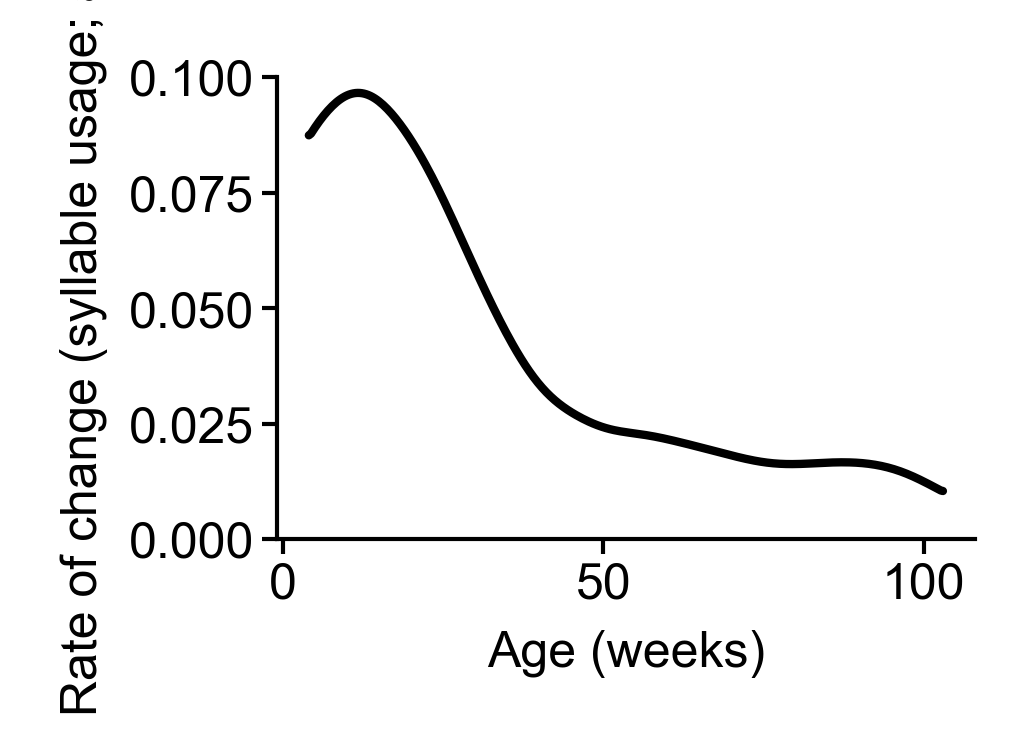

In [11]:
fig = figure(1.5, 1)
plt.plot(age_scaler.inverse_transform(time), np.linalg.norm(grad_array, axis=0), c='k')
plt.ylabel("Rate of change (syllable usage; a.u.)")
plt.xlabel('Age (weeks)')
plt.ylim(0, 0.1)
sns.despine()
saver(fig, "ontogeny-male-syllable-rate-of-change");

## Ontogeny females

In [12]:
df = pd.read_parquet(
    "/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_relabeled_usage_matrix_v00.parquet"
)

age = df.index.get_level_values("age")
age_mask = age != 127

df = df[age_mask]

In [13]:
age_scaler = StandardScaler()
x = df.index.get_level_values("age")
x = age_scaler.fit_transform(x.to_numpy()[:, None])
time = np.linspace(np.min(x), np.max(x), 300)[:, None]

In [14]:
keep_sylls = list(range(60))

kernel = 1 * RBF(length_scale=5e2, length_scale_bounds=(1e-3, 1e3))

out = {}
grads = {}

index = pd.Index(age_scaler.inverse_transform(time).squeeze(), name="age")

r2_scores = {}

for syll in tqdm(keep_sylls):
    y = df[syll]
    gp = GaussianProcessRegressor(
        kernel=kernel, n_restarts_optimizer=5, alpha=2.75, normalize_y=True
    )
    gp.fit(x, y)
    r2_scores[syll] = gp.score(x, y)
    grads[syll] = np.gradient(gp.predict(time), time.squeeze())
    out[syll] = pd.Series(gp.predict(time), index=index, name="Predicted usage")

  0%|          | 0/60 [00:00<?, ?it/s]

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/wg41/miniconda3/env

<Axes: xlabel='age', ylabel='0'>

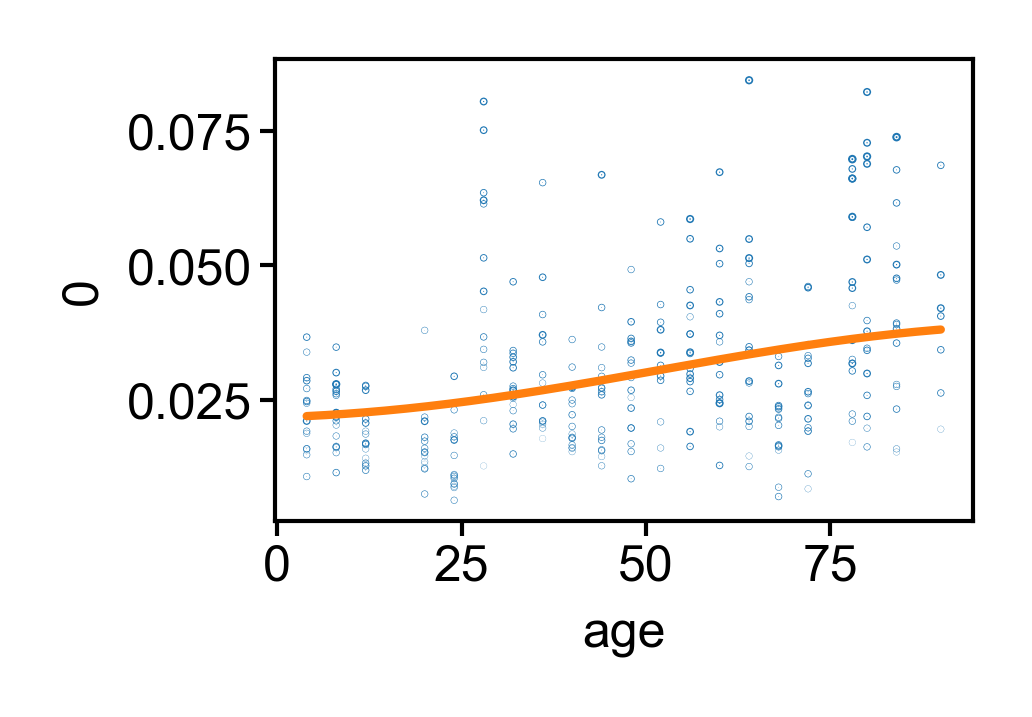

In [15]:
fig = figure(1.5, 1)
ax = fig.gca()
df.reset_index().plot(kind='scatter', y=keep_sylls[0], x='age', s=10, ax=ax)
out[keep_sylls[0]].plot(ax=ax, c='C1')

In [16]:
score_thresh = 0.20
remove_syll = [24, 2, 20, 11, 29, 0, 3, 18, 28, 39]
keep_grads = keyfilter(lambda k: (r2_scores[k] > score_thresh) and k not in remove_syll, grads)

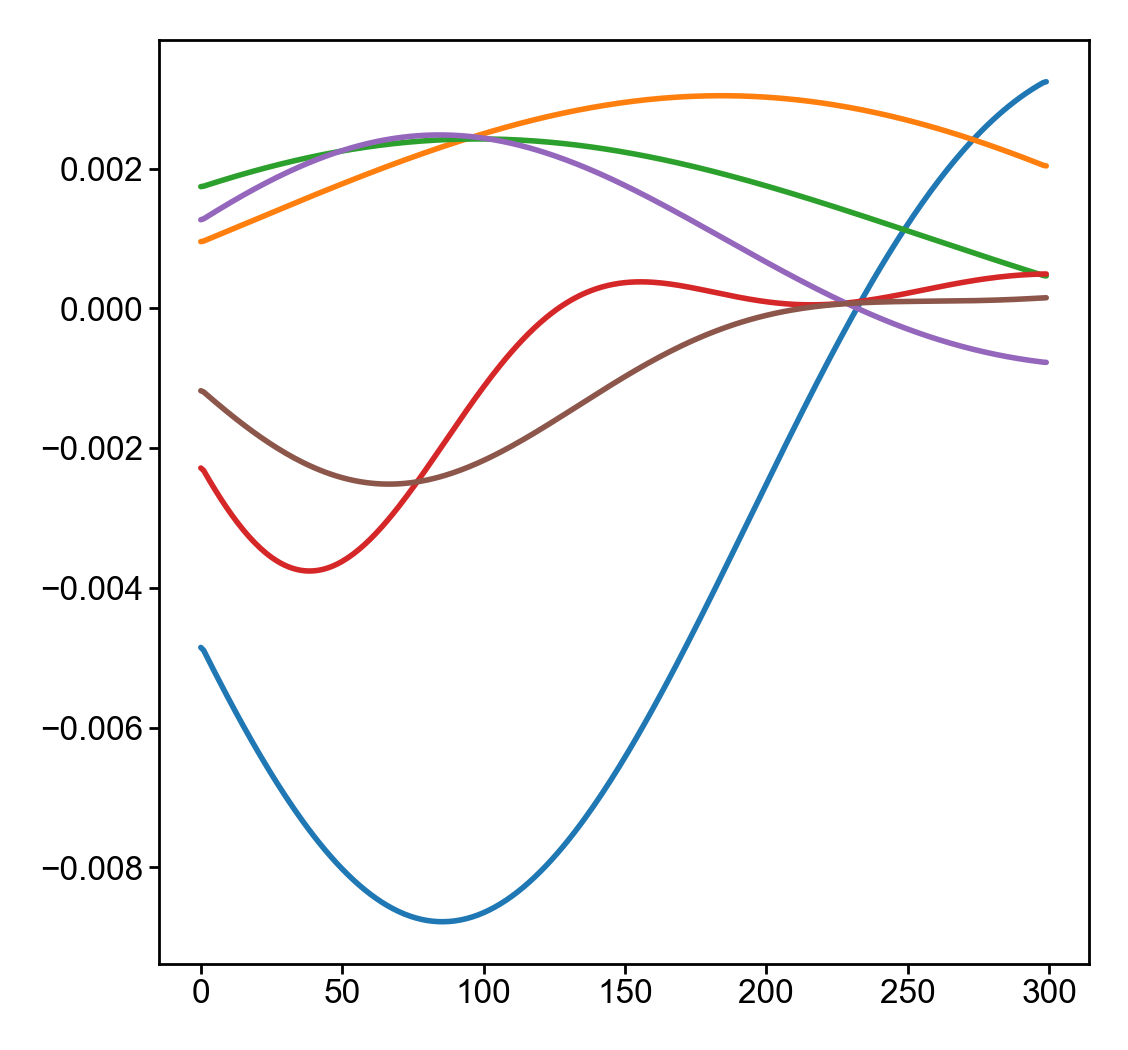

In [17]:
for k, v in keep_grads.items():
    plt.plot(v, label=k)

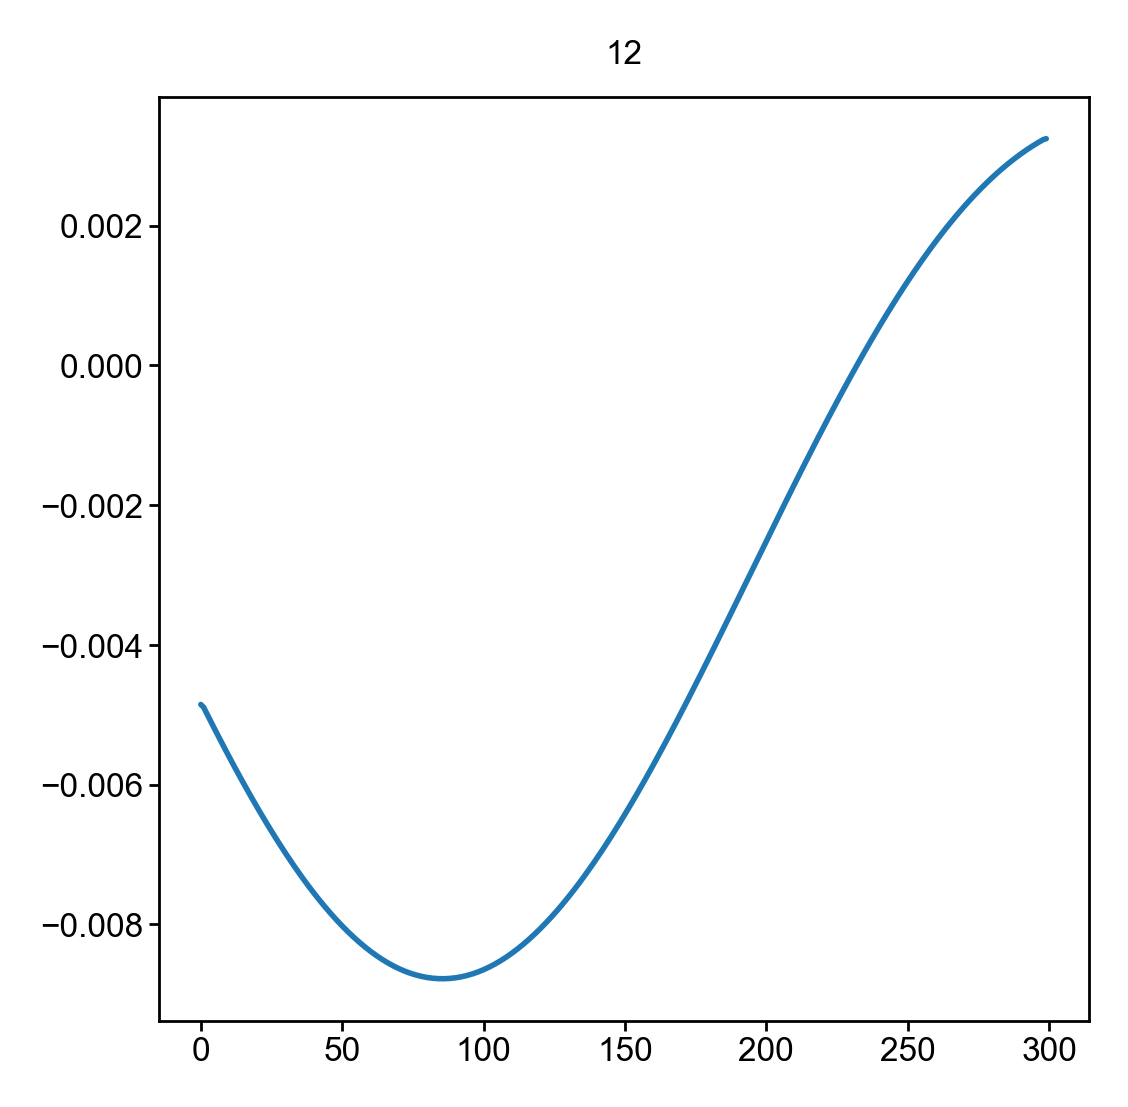

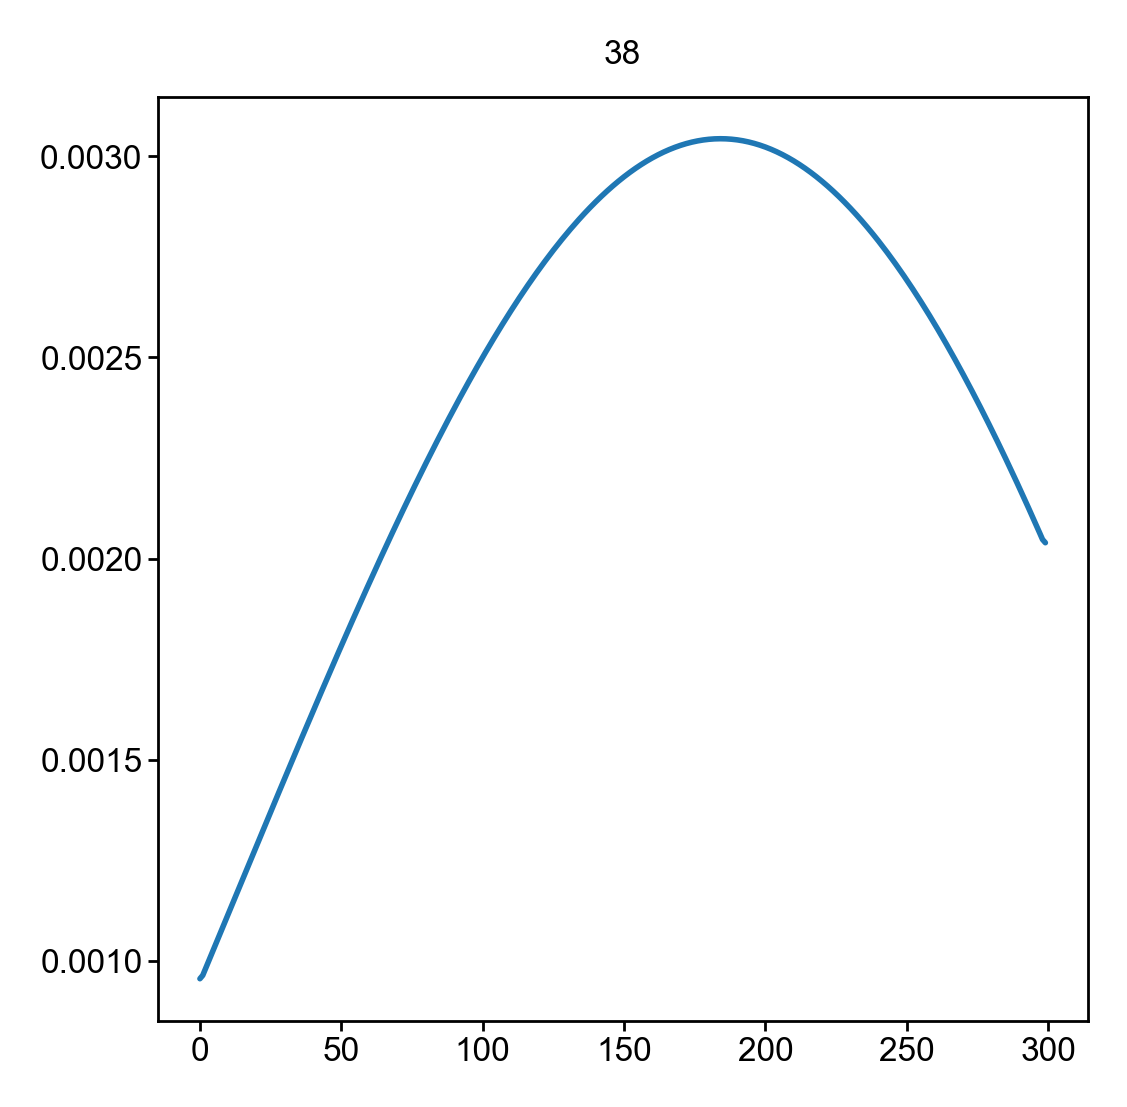

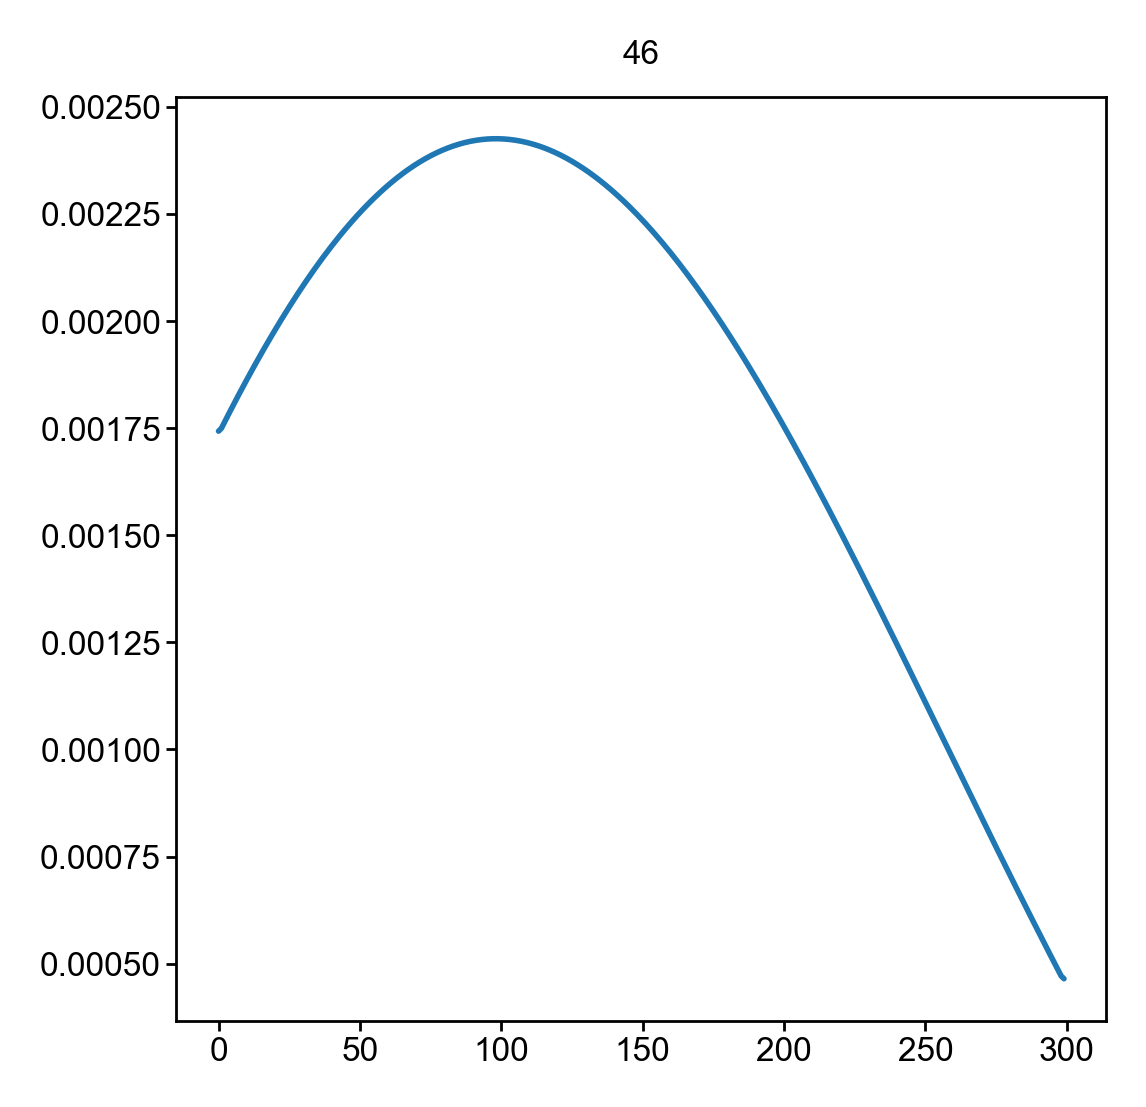

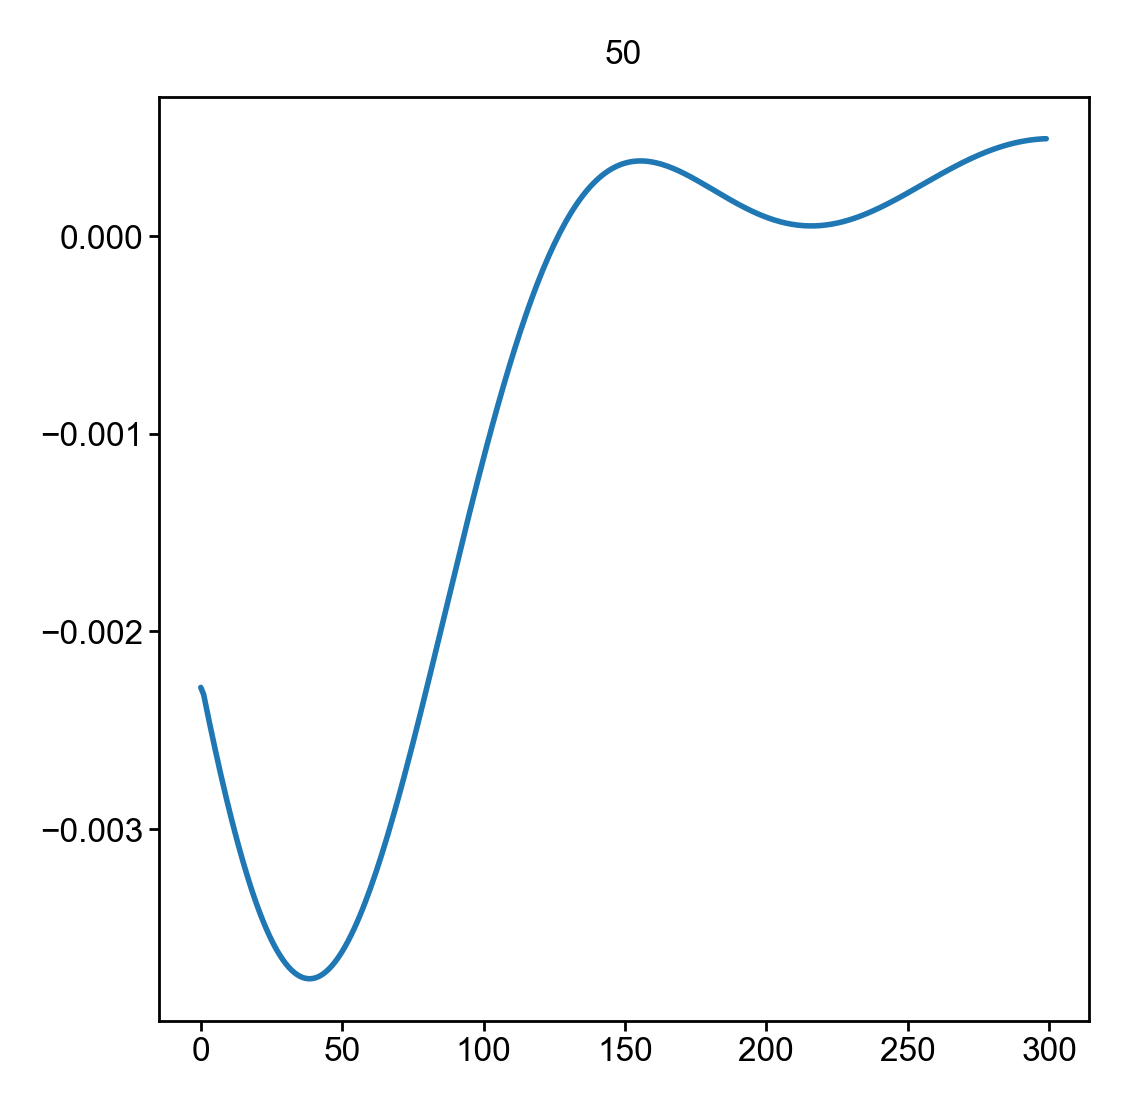

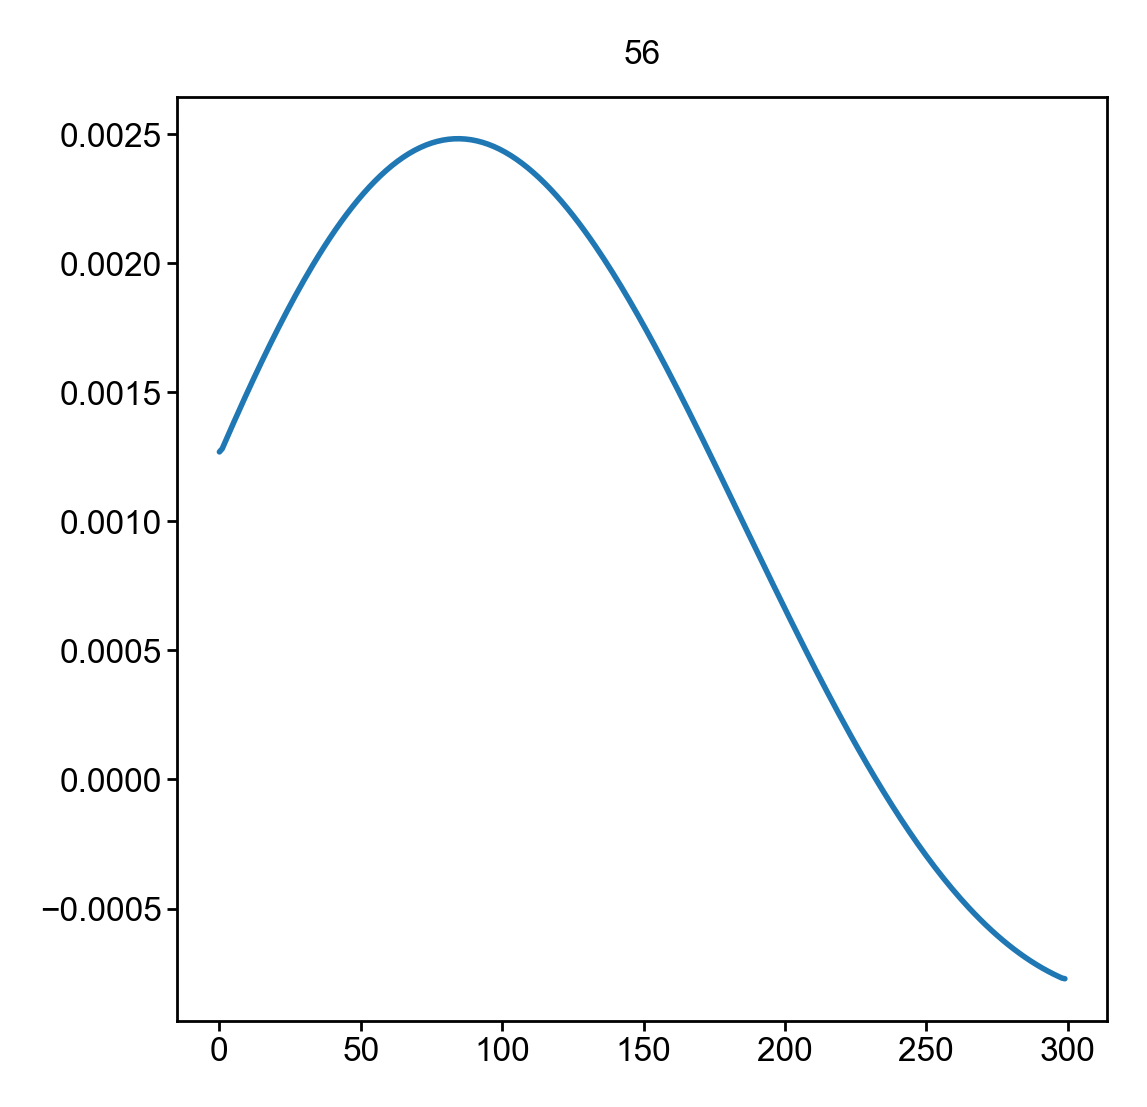

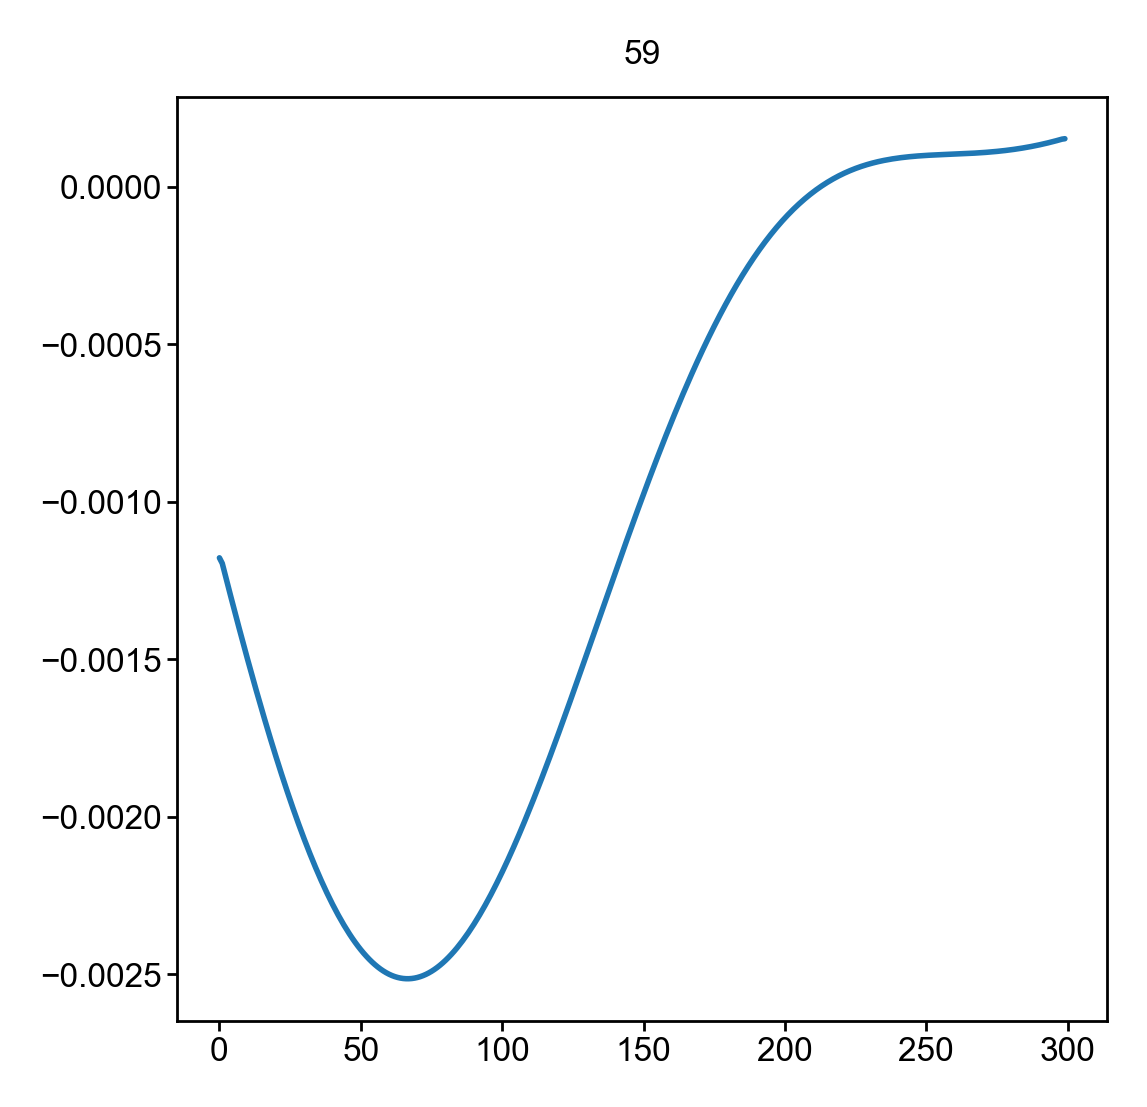

In [18]:
for k, v in keep_grads.items():
    plt.figure()
    plt.plot(v, label=k)
    plt.title(k)

In [19]:
grad_array = np.array(list(keep_grads.values()))

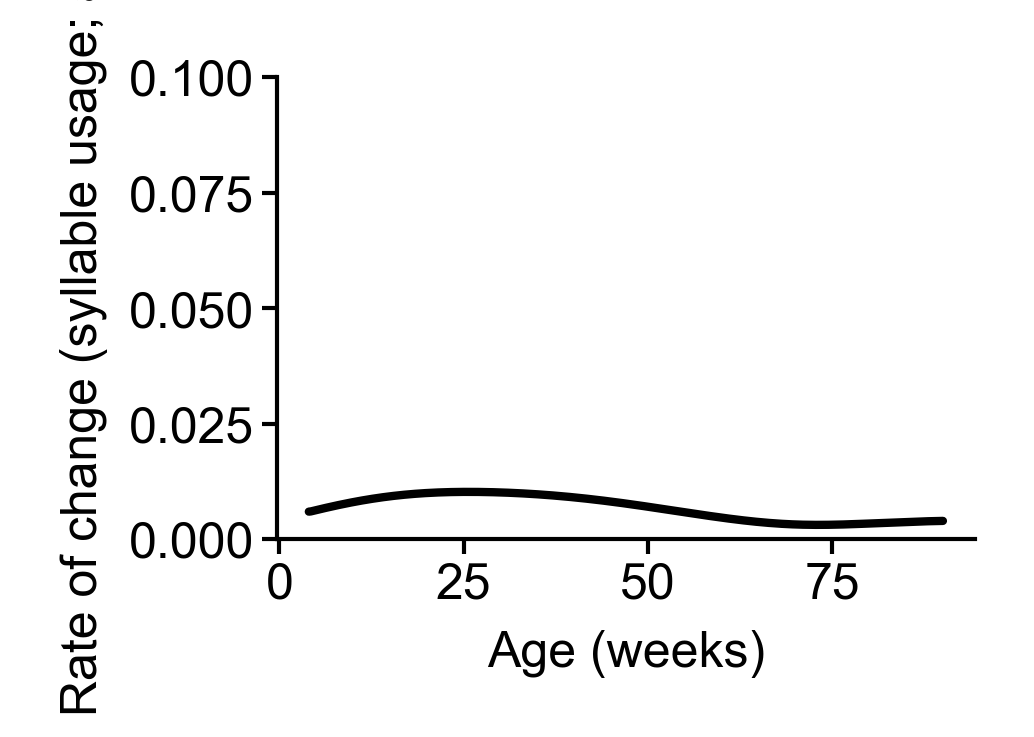

In [20]:
fig = figure(1.5, 1)
plt.plot(age_scaler.inverse_transform(time), np.linalg.norm(grad_array, axis=0), c="k")
plt.ylabel("Rate of change (syllable usage; a.u.)")
plt.xlabel("Age (weeks)")
plt.ylim(0, 0.1)
sns.despine()
saver(fig, "ontogeny-female-syllable-rate-of-change");